### 1. Try out different clustering models in the given dataset. 
### 2. Find the optimum number of clusters in each model and create the model with optimum number of clusters. 
### 3.  Also learn about dB scan clustering and implement it.

### 1. Try out different clustering models in the given dataset.

In [1]:
### importing libraries

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\susmi\DSA\Wine_clust .csv')

In [3]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


<AxesSubplot:xlabel='Alcohol', ylabel='Color_Intensity'>

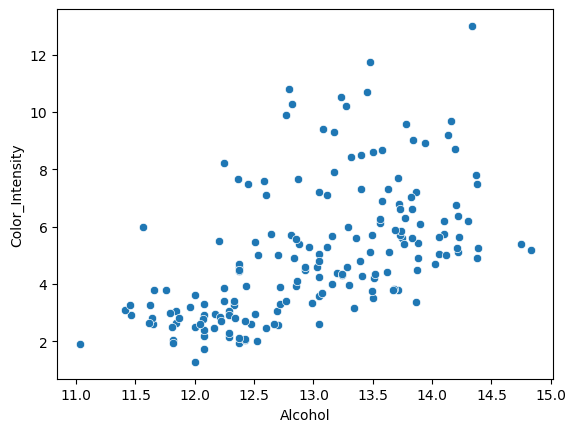

In [4]:
sns.scatterplot(x = 'Alcohol', y = 'Color_Intensity', data = data)

### K-Means Clustering Model

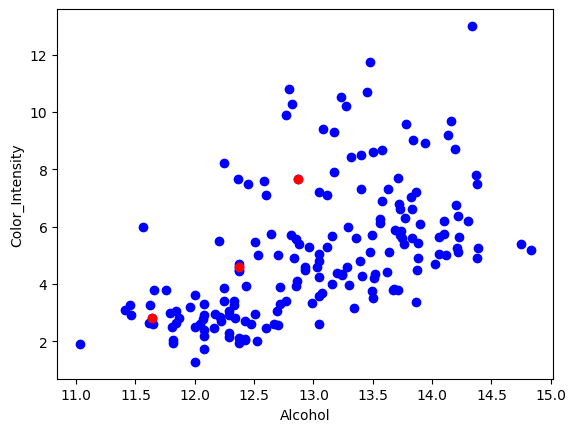

In [5]:
### step 1 :: choosing no.of clusters k = 3
### step 2 :: selecting random centroids for each cluster

X = data
K = 3 ### no.of clusters

### select random observations as centroids
Centroids = (X.sample(n = K))
plt.scatter(X['Alcohol'], X['Color_Intensity'], c = 'blue')
plt.scatter(Centroids['Alcohol'], Centroids['Color_Intensity'], c = 'red')
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')
plt.show()

In [6]:
### implement kmeans

from sklearn.cluster import KMeans
K = 3

In [7]:
### fit kmeans model
kmeans = KMeans(n_clusters = K, random_state = 0)
X['Cluster'] = kmeans.fit_predict(X[['Alcohol', 'Color_Intensity']])

C:\Users\susmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\susmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


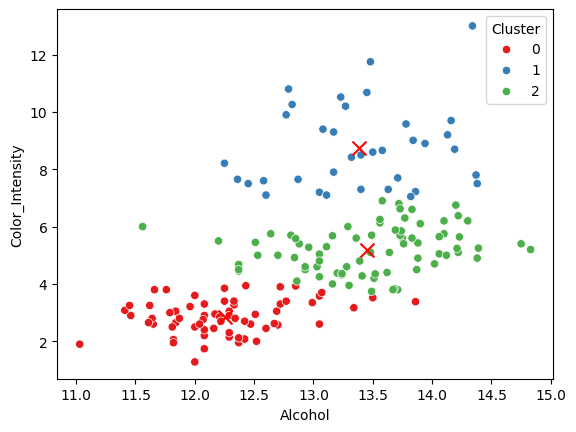

In [9]:
### get cluster centroids
centroids = kmeans.cluster_centers_

### plot the data points and centroids
sns.scatterplot(data = X, x = 'Alcohol', y = 'Color_Intensity', hue = 'Cluster', palette = 'Set1')
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', marker = 'x', s = 100)
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')
plt.show()

In [10]:
### get the inertia (sum of clusters called inertia) 

inertia = kmeans.inertia_
inertia

203.8193758446264

In [11]:
### importing and evaluation sillhouette score

from sklearn.metrics import silhouette_score

In [12]:
silhouette_avg = silhouette_score(X[['Alcohol', 'Color_Intensity']], X['Cluster'])
print('Silhouette Score:', silhouette_avg)

Silhouette Score: 0.5097267872581326


### Hierarchial Clustering Model

<AxesSubplot:xlabel='Alcohol', ylabel='Color_Intensity'>

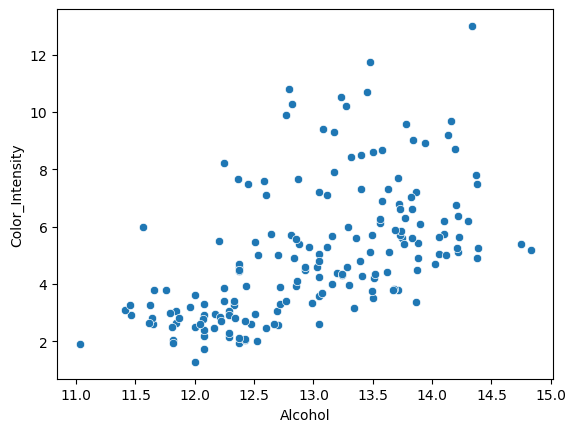

In [13]:
sns.scatterplot(x = 'Alcohol', y = 'Color_Intensity', data = data)

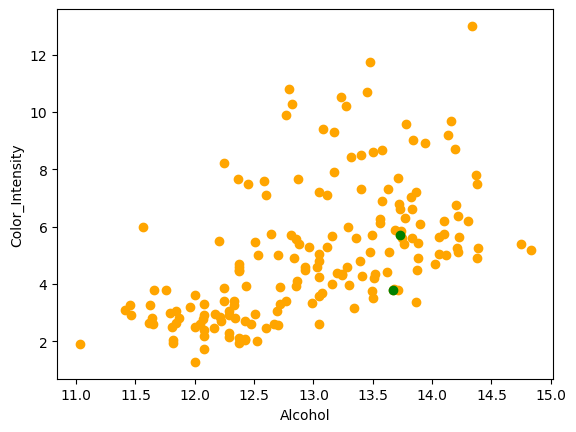

In [14]:
### step 1 :: choosing no.of clusters k = 3
### step 2 :: selecting random centroids for each cluster

X = data
Kk = 2 ### no.of clusters

### select random observations as centroids
Centroids = (X.sample(n = Kk))
plt.scatter(X['Alcohol'], X['Color_Intensity'], c = 'orange')
plt.scatter(Centroids['Alcohol'], Centroids['Color_Intensity'], c = 'green')
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')
plt.show()

In [15]:
from sklearn.cluster import KMeans
Kk = 2

### fit kmeans model
kmeans = KMeans(n_clusters = Kk, random_state = 0)
X['Cluster'] = kmeans.fit_predict(X[['Alcohol', 'Color_Intensity']])

C:\Users\susmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\susmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


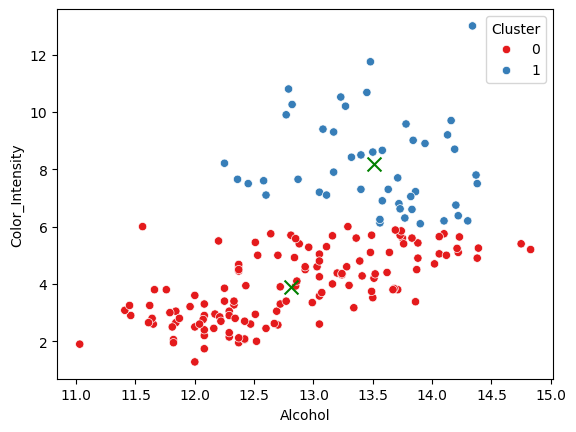

In [17]:
### get cluster centroids
centroids = kmeans.cluster_centers_

### plot the data points and centroids
sns.scatterplot(data = X, x = 'Alcohol', y = 'Color_Intensity', hue = 'Cluster', palette = 'Set1')
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'green', marker = 'x', s = 100)
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')
plt.show()

In [18]:
### get the inertia (sum of clusters called inertia) 
inertia = kmeans.inertia_
inertia

415.2359949665714

In [19]:
### silhouette score

silhouette_avgs = silhouette_score(X[['Alcohol', 'Color_Intensity']], X['Cluster'])
print('Silhouette Score:', silhouette_avgs)

Silhouette Score: 0.539948544942979


### 2. Find the optimum number of clusters in each model and create the model with optimum number of clusters.

###### elbow method :::::: kmeans clustering

C:\Users\susmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\susmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\susmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\susmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

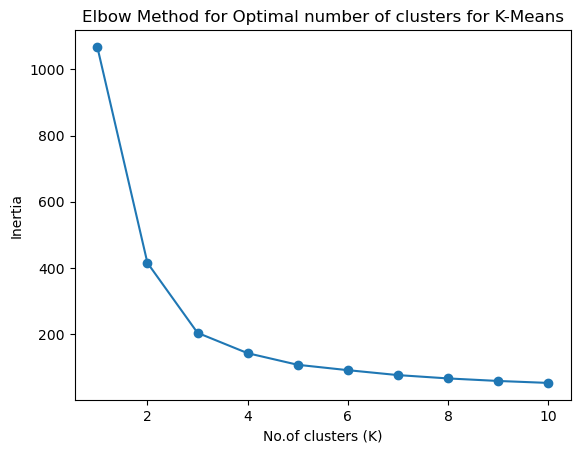

In [20]:
### define a range of K values to test

K_range = range(1, 11)  ###(start, stop + 1)   (start = 1 stop = 10)(1,11)
inertia_values = []  

#calculate inertia for different values of K
for K in K_range:
    kmeans = KMeans(n_clusters = K, random_state = 0)
    kmeans.fit(X[['Alcohol', 'Color_Intensity']])
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
    
### plot inertia values
plt.plot(K_range, inertia_values, marker = 'o')
plt.title('Elbow Method for Optimal number of clusters for K-Means')
plt.xlabel('No.of clusters (K)')
plt.ylabel('Inertia')
plt.show()

### 2. Find the optimum number of clusters in each model and create the model with optimum number of clusters.

###### elbow method :::::: hierarchical clustering

In [21]:
# Find and display optimal number of clusters for K-Means

from sklearn.cluster import AgglomerativeClustering

In [22]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(X[['Alcohol', 'Color_Intensity']])

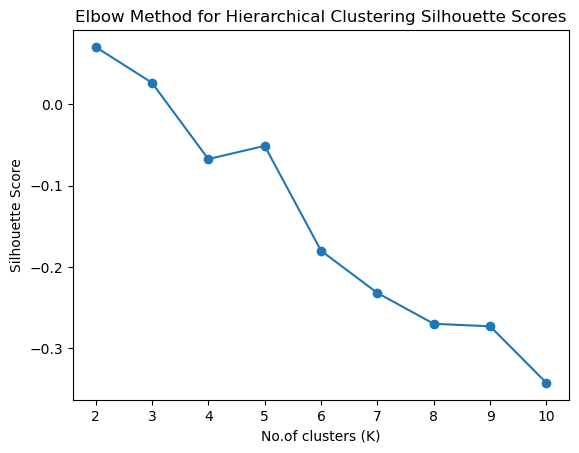

In [23]:
### define a range of K values to test

K_range = range(2, 11)  ###(start, stop + 1)   (start = 1 stop = 10)(1,11)
silhouette_scores = []  

#calculate inertia for different values of K
for Kk in K_range:
    hierarchical = AgglomerativeClustering(n_clusters = Kk)
    labels = hierarchical.fit_predict(X[['Alcohol', 'Color_Intensity']])
    silhouette_avgs = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avgs)
    
### plot inertia values
plt.plot(K_range, silhouette_scores, marker = 'o')
plt.title('Elbow Method for Hierarchical Clustering Silhouette Scores')
plt.xlabel('No.of clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

### 3. Also learn about dB scan clustering and implement it.

In [24]:
### importing library for dB scan clustering

from sklearn.cluster import DBSCAN

In [25]:
def dbscan_clustering(data, eps, min_samples):
    dbscan = DBSCAN(eps = eps, min_samples = min_samples)
    labels = dbscan.fit_predict(data)

In [26]:
### dB scan clustering

eps = 1.0
min_samples = 5
dbscan_labels = dbscan_clustering(data, eps, min_samples)

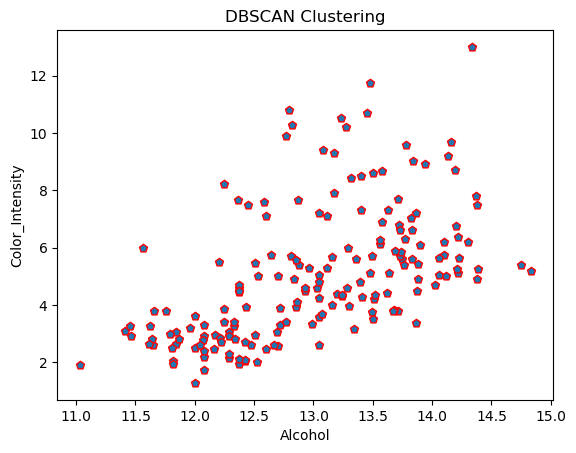

In [27]:
### plotting dB scan clustering

plt.scatter(data['Alcohol'], data['Color_Intensity'], c = dbscan_labels, marker = 'p', edgecolor = 'red')
plt.title('DBSCAN Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')
plt.show()